# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units='metric'
# Define an empty list to fetch the weather data for each city
city_data = [] #doesnt this already exist in cities?
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
city_name=[]    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #print(weather_json)
    # Log the url, record, and set numbers

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    # Parse the JSON and retrieve data
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_json = requests.get(query_url).json()
    set_count = 1
 
    try:   # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat.append(weather_json['coord']['lat'])
        city_lng.append(weather_json['coord']['lon'])
        city_max_temp.append(weather_json['main']['temp_max'])
        city_humidity.append(weather_json['main']['humidity'])
        city_clouds.append(weather_json['clouds']['all'])
        city_wind.append(weather_json['wind']['speed'])
        city_country.append(weather_json['sys']['country'])
        city_date.append(weather_json['dt'])
        city_name.append(weather_json['name'])
           
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data={"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | parham
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | saint croix
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | likasi
Processing Record 10 of Set 1 | necocli
Processing Record 11 of Set 1 | puerto san jose
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | onega
Processing Record 18 of Set 1 | yabelo
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | axim
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | lompoc
Processing Record 23 of Set 1 | st. john's
Processing R

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port-aux-Français,-49.3500,70.2167,1.12,67,99,16.80,TF,1696973510
1,Vorgashor,67.5833,63.9500,1.30,81,100,5.75,RU,1696973510
2,Parham,17.0968,-61.7705,28.83,74,20,3.09,AG,1696973511
3,Talnakh,69.4865,88.3972,2.34,96,100,4.84,RU,1696973511
4,Saint Croix,17.7397,-64.7388,30.25,76,0,5.66,VI,1696973511


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port-aux-Français,-49.3500,70.2167,1.12,67,99,16.80,TF,1696973510
1,Vorgashor,67.5833,63.9500,1.30,81,100,5.75,RU,1696973510
2,Parham,17.0968,-61.7705,28.83,74,20,3.09,AG,1696973511
3,Talnakh,69.4865,88.3972,2.34,96,100,4.84,RU,1696973511
4,Saint Croix,17.7397,-64.7388,30.25,76,0,5.66,VI,1696973511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

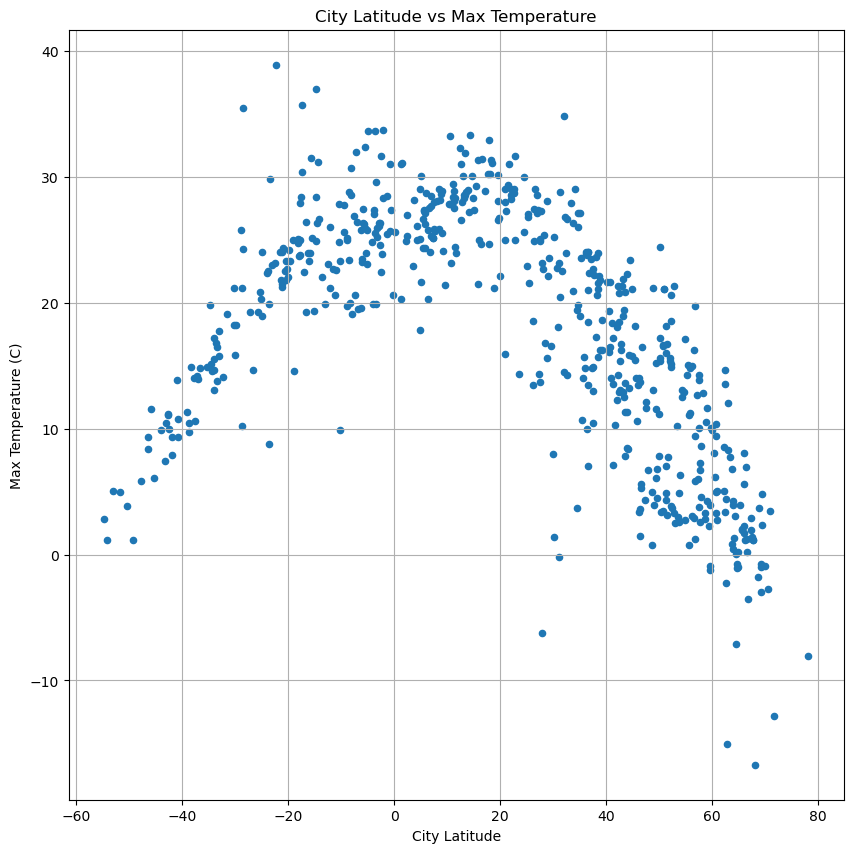

In [25]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,10),
              title="City Latitude vs Max Temperature", ylabel="Max Temperature (C)", xlabel="City Latitude" )

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

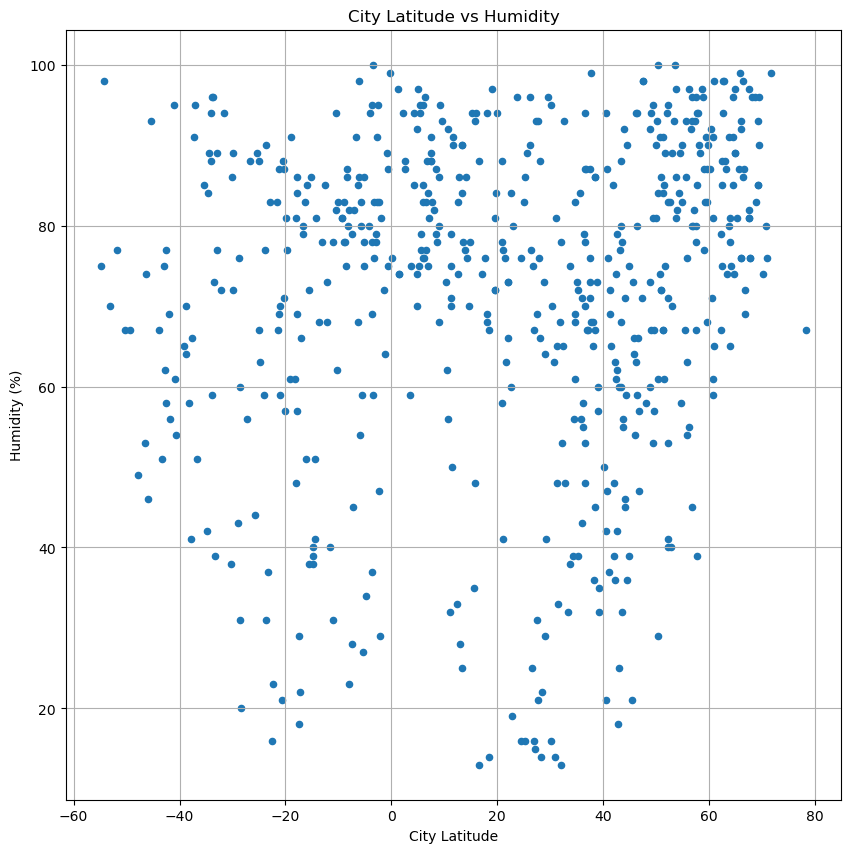

In [26]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,10),
              title="City Latitude vs Humidity",ylabel="Humidity (%)", xlabel="City Latitude" )
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

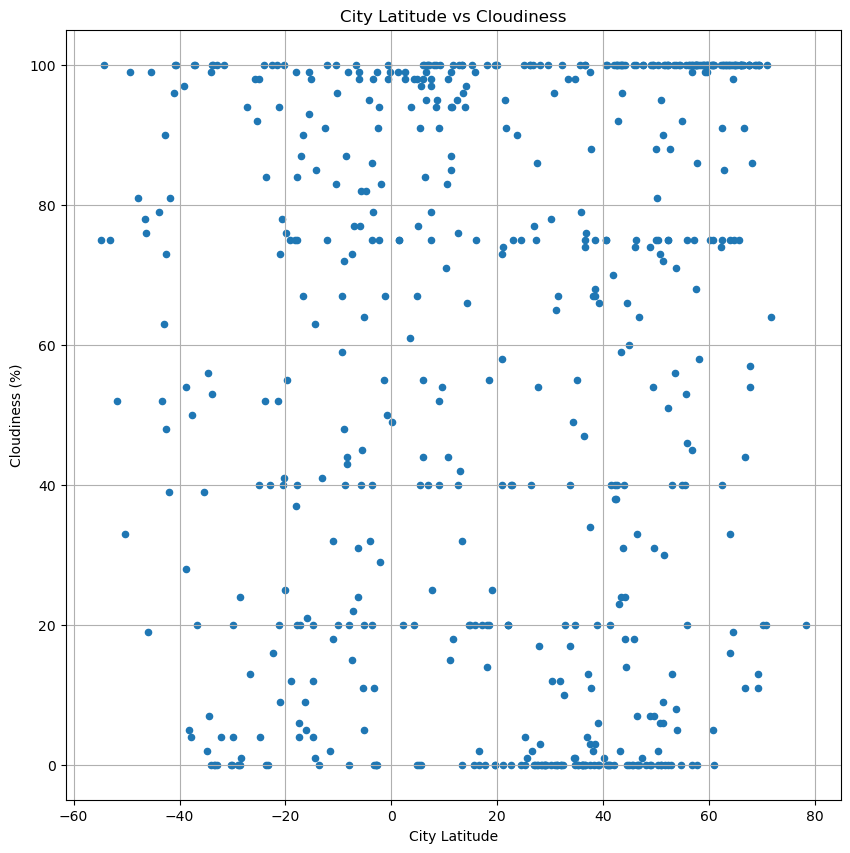

In [27]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,10),
              title="City Latitude vs Cloudiness",ylabel="Cloudiness (%)", xlabel="City Latitude" )


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

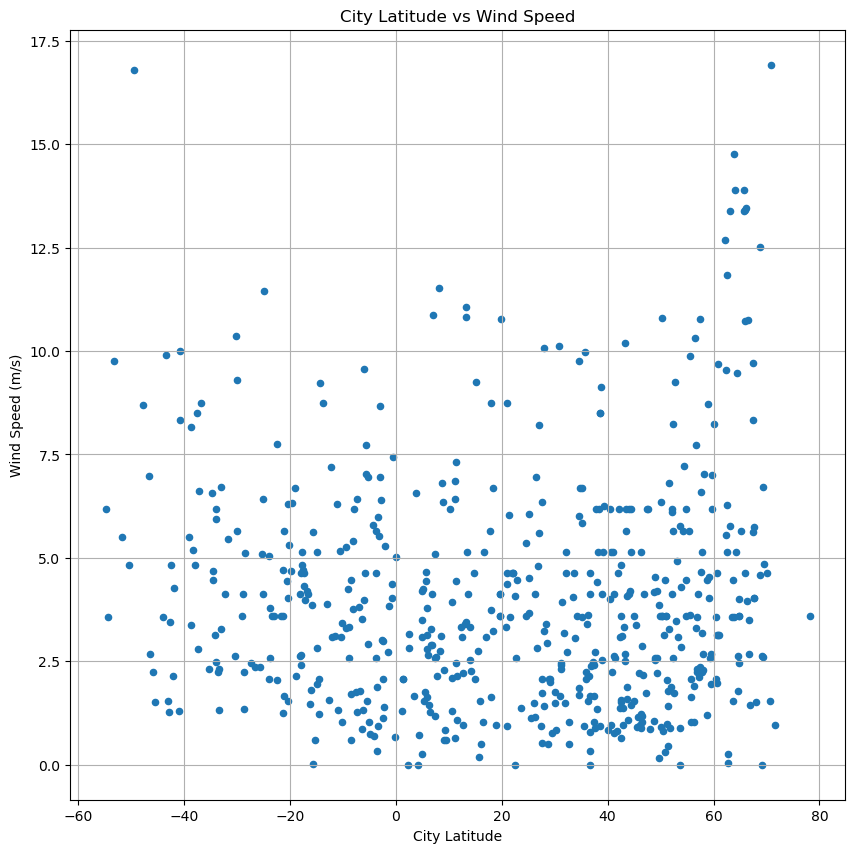

In [28]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,10),
              title="City Latitude vs Wind Speed",ylabel="Wind Speed (m/s)", xlabel="City Latitude" )


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def show_linear_regression(df, x_column, y_column):
    # Extract the x and y values from the dataframe
    x = df[x_column]
    y = df[y_column]
    
    # Create and fit the linear regression model
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the data points and the linear regression line
    #generate plots
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, regress_values, color='red', label='Linear Regression')

    #print values
    plt.annotate(line_eq,(20,10),fontsize=15,color="red")
    
    # Add labels and title to the plot
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    
    # Display the legend and plot
    plt.legend()
    plt.show()
    print(f"The r-squared is: {rvalue**2}")


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Vorgashor,67.5833,63.9500,1.30,81,100,5.75,RU,1696973510
2,Parham,17.0968,-61.7705,28.83,74,20,3.09,AG,1696973511
3,Talnakh,69.4865,88.3972,2.34,96,100,4.84,RU,1696973511
4,Saint Croix,17.7397,-64.7388,30.25,76,0,5.66,VI,1696973511
6,Iqaluit,63.7506,-68.5145,0.85,80,100,1.54,CA,1696973512


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port-aux-Français,-49.3500,70.2167,1.12,67,99,16.80,TF,1696973510
5,Puerto Natales,-51.7236,-72.4875,4.98,77,52,5.51,CL,1696973511
7,Likasi,-10.9814,26.7333,22.63,31,18,1.33,CD,1696973512
10,Bredasdorp,-34.5322,20.0403,15.10,84,56,4.47,ZA,1696973513
11,Lüderitz,-26.6481,15.1594,14.66,88,13,2.37,NaN,1696973513


###  Temperature vs. Latitude Linear Regression Plot

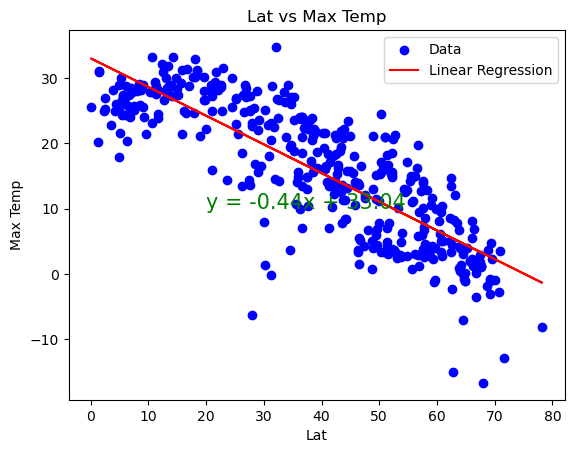

The r-squared is: 0.6872092700807875


In [36]:
# Linear regression on Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Max Temp')


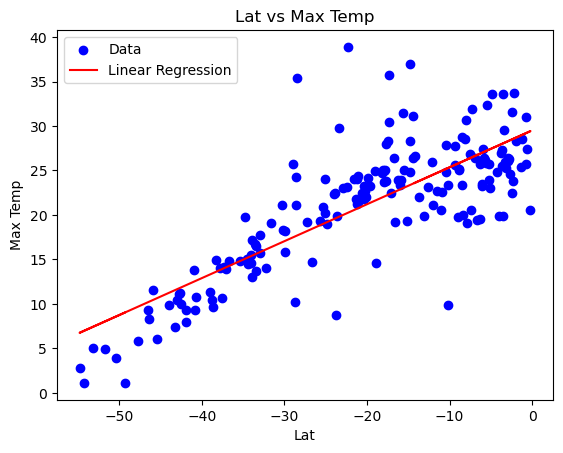

The r-squared is: 0.6316381317381041


In [37]:
# Linear regression on Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Max Temp')

### Humidity vs. Latitude Linear Regression Plot

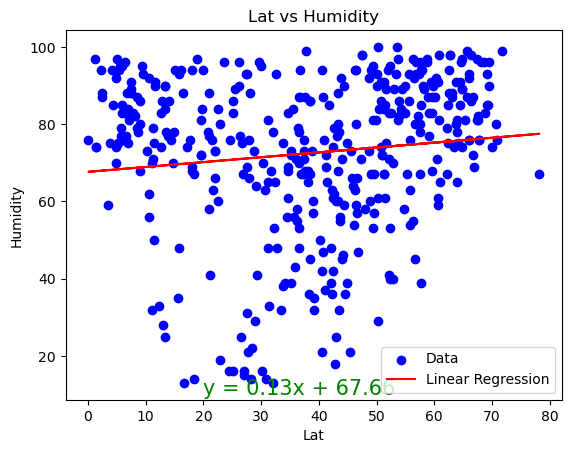

The r-squared is: 0.014429800827617549


In [38]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Humidity')

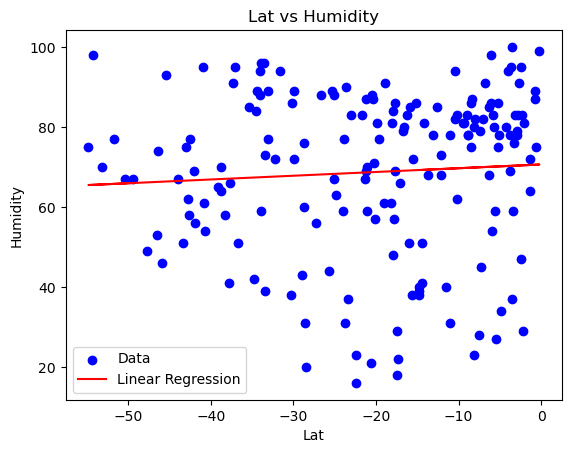

The r-squared is: 0.004294504339691634


In [39]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Humidity')

### Cloudiness vs. Latitude Linear Regression Plot

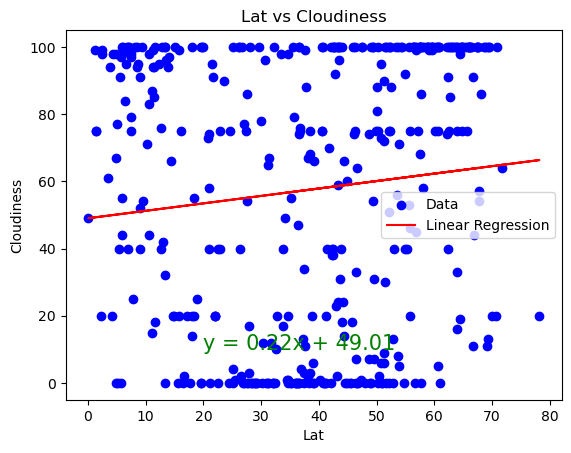

The r-squared is: 0.011495332665538833


In [40]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Cloudiness')

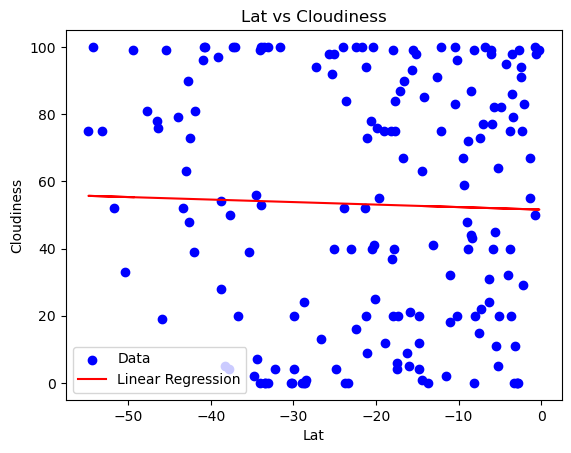

The r-squared is: 0.0008512500448169432


In [41]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Cloudiness')

### Wind Speed vs. Latitude Linear Regression Plot

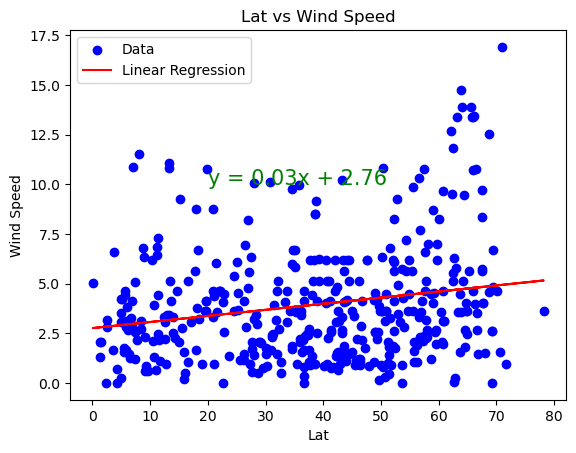

The r-squared is: 0.04104360156888252


In [42]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Wind Speed')

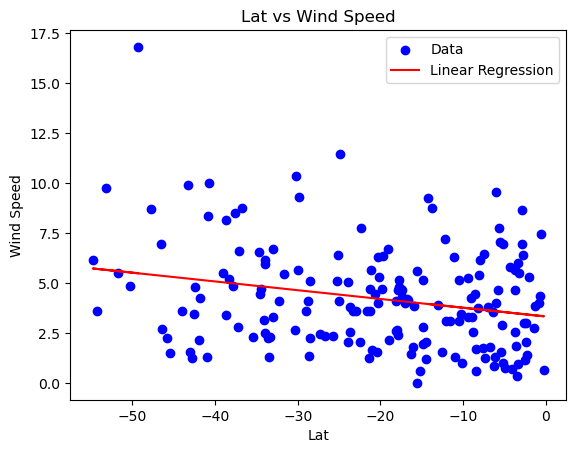

The r-squared is: 0.0594171827282808


In [43]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Wind Speed')